# Stock Market Prediction using Recurrent Neural Networks (RNNs)

Stock market prices are sequential datasets that depend on many variables. Is it possible to make prediction of future prices based on historical data?

If so, recurrent neural networks might be a good technique to test. Here I predict future stock prices using 10 years of stock price data.

Keras is used with TensorFlow as backend.


In [19]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense,LSTM
np.random.seed(7)
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Set twitter API Authentication

#inserting API Keys
consumer_key= 'XXXXXXX'
consumer_secret= 'XXXXXXX'
access_token='XXXXXXX'
access_token_secret='XXXXXXX'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## 1. Load and Prepare Data

In [16]:

#searcing company on twitter
public_tweets = api.search('Obama')


In [17]:
#Defining a threshold for each sentiment
threshold=0
pos_sent_tweet=0
neg_sent_tweet=0
for tweet in public_tweets:
    analysis=TextBlob(tweet.text)
    if analysis.sentiment.polarity>=threshold:
        pos_sent_tweet=pos_sent_tweet+1
    else:
        neg_sent_tweet=neg_sent_tweet+1
if pos_sent_tweet>neg_sent_tweet:
    print("Overall Positive")
else:
    print("Overall Negative")

Overall Positive


In [59]:
import datetime as dt
import pandas_datareader.data
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2017, 1, 27)
data = pandas_datareader.DataReader("AMZN", 'yahoo', start, end)
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,256.079987,258.100006,253.259995,257.309998,257.309998,3271000
2013-01-03,257.269989,260.880005,256.369995,258.480011,258.480011,2750900
2013-01-04,257.579987,259.799988,256.649994,259.149994,259.149994,1874200
2013-01-07,262.970001,269.730011,262.670013,268.459991,268.459991,4910000
2013-01-08,267.070007,268.980011,263.570007,266.380005,266.380005,3010700


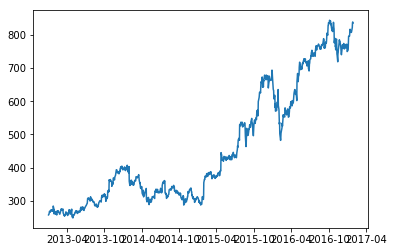

In [58]:
#print(data['Close'])
plt.plot(data['Close'])

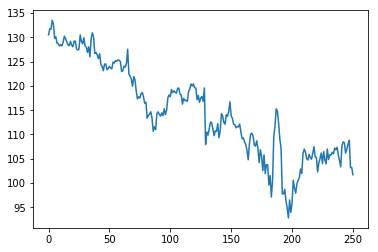

In [56]:
#data collection
dates = []
prices = []
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return
get_data('fb.csv')
plt.plot(prices)

plt.show()

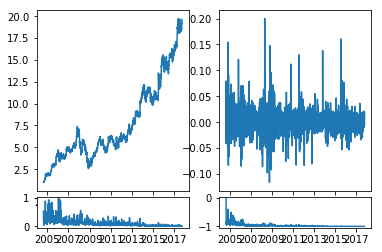

In [32]:
# plot normalized data
stock_data_preprocessing.stock_plot((data_n,))


## Split data into training and testing sets

In [26]:
# training data
prediction_time = 1 #day
#testdatasize = 450
sequence_length = 50
#testdatacut = testdatasize + sequence_length  + 1


def generate_sequences(data,sequence_length=50):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

    train_size = round(0.9 * result.shape[0])
    train = result[:int(train_size), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    print('x_train len',x_train.shape)
    print('x_train[0]',x_train[0])
    y_train = train[:, -1]
    print('y_train len',y_train.shape)
    print('y_train[0]',y_train[0])


    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

###

x_train = data_n[0:-prediction_time-testdatacut].as_matrix()
print(x_train)
y_train = data_n[prediction_time:-testdatacut  ]['Normalised Close'].as_matrix()
print(prediction_time,-testdatacut)
# test data
x_test = data_n[0-testdatacut:-prediction_time].as_matrix()
print(0-testdatacut,-prediction_time)
y_test = data_n[prediction_time-testdatacut:  ]['Normalised Close'].as_matrix()
print(prediction_time-testdatacut)






x_train = unroll(x_train,unroll_length)
x_test  = unroll(x_test,unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

[[  7.31812000e-01   3.00000000e+00   5.43621274e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.31813000e-01   4.00000000e+00   2.77954913e-01 ...,   6.67725238e-03
    8.71038046e-02   1.59457761e-03]
 [  7.31816000e-01   0.00000000e+00   2.22225713e-01 ...,   2.25279226e-02
    4.77333261e-02   6.83227690e-03]
 ..., 
 [  7.35878000e-01   2.00000000e+00   2.52838956e-02 ...,   5.88743801e-03
    8.00850115e-03  -2.05905707e-02]
 [  7.35879000e-01   3.00000000e+00   2.63640219e-02 ...,  -1.55675949e-03
    3.25366936e-03  -2.61535391e-02]
 [  7.35880000e-01   4.00000000e+00   1.99195101e-02 ...,   1.31426722e-03
    1.06859273e-02  -6.01098342e-03]]
1 -501
-501 -1
-500
x_train (2756, 50, 12)
y_train (2756,)
x_test (450, 50, 12)
y_test (450,)


In [3]:
X_train, y_train, X_test, y_test = lstm.load_data('sp500_1.csv', 50, True)


In [14]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=x_train.shape[-1],
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

/Users/Home/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/Home/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 12), units=50)`


compilation time : 0.04135608673095703


/Users/Home/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [15]:
#Step 3 Train the model
model.fit(
    x_train,
    y_train,
    batch_size=3028,
    nb_epoch=350,
    validation_split=0.05)

/Users/Home/anaconda3/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2618 samples, validate on 138 samples
Epoch 1/350
2618/2618 [==============================] - 7s - loss: 0.0368 - val_loss: 0.9946
Epoch 2/350
2618/2618 [==============================] - 5s - loss: 0.9981 - val_loss: 8.6936e-04
Epoch 3/350
2618/2618 [==============================] - 5s - loss: 0.0092 - val_loss: 9.2655e-04
Epoch 4/350
2618/2618 [==============================] - 4s - loss: 0.0090 - val_loss: 6.1498e-04
Epoch 5/350
2618/2618 [==============================] - 4s - loss: 0.0089 - val_loss: 5.8603e-04
Epoch 6/350
2618/2618 [==============================] - 4s - loss: 0.0092 - val_loss: 6.3381e-04
Epoch 7/350
2618/2618 [==============================] - 4s - loss: 0.0085 - val_loss: 5.5701e-04
Epoch 8/350
2618/2618 [==============================] - 4s - loss: 0.0084 - val_loss: 5.9044e-04
Epoch 9/350
2618/2618 [==============================] - 4s - loss: 0.0088 - val_loss: 5.7355e-04
Epoch 10/350
2618/2618 [==============================] - 4s - loss: 0.0085

yo


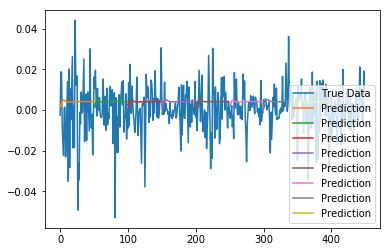

In [21]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, x_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)